CS512 - Computer Vision - Assignment 3 - S1

Submitted by-

Tushar Gwal A20449419

In [244]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#Part 1: Generates points belonging to a line segment with parameters angle and distance from origin

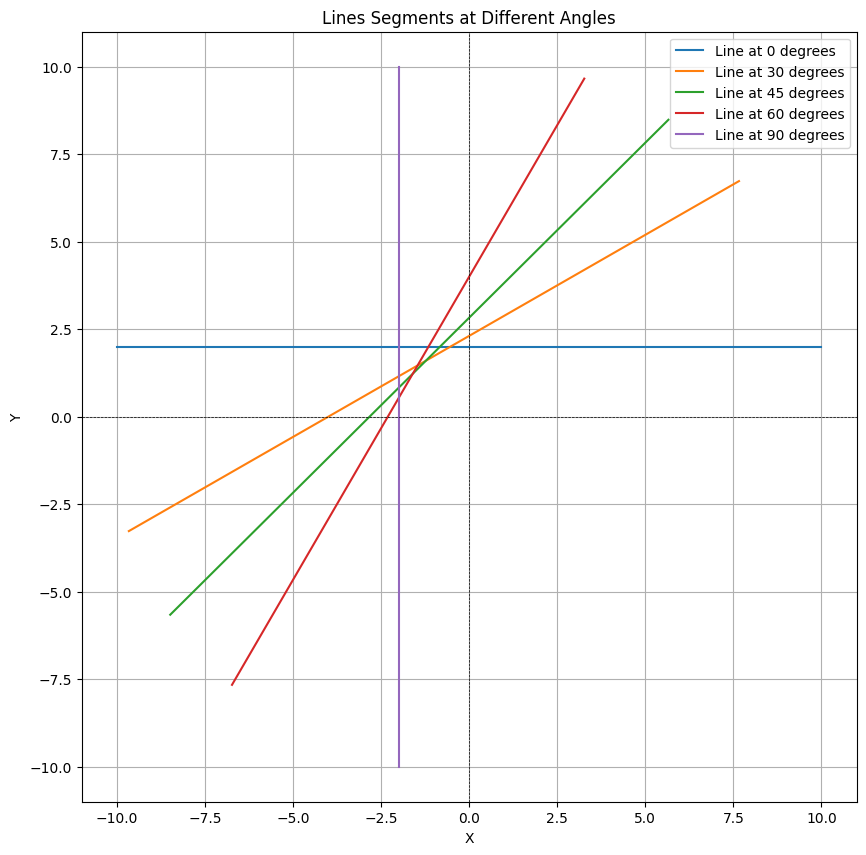

In [245]:
import numpy as np
import matplotlib.pyplot as plt

def gen_line_pts(ang, dist, n_pts=100):
    norm_ang = ang + np.pi / 2
    x0 = dist * np.cos(norm_ang)
    y0 = dist * np.sin(norm_ang)
    dx = np.cos(ang)
    dy = np.sin(ang)
    t = np.linspace(-10, 10, n_pts)
    x = x0 + t * dx
    y = y0 + t * dy
    return x, y

ang = [0, 30, 45, 60, 90]   #angles
dist =  2              #distance from orgin
lines = []
for i in ang:
    rad = np.deg2rad(i)
    x, y = gen_line_pts(rad, dist)
    lines.append((x, y, i))

plt.figure(figsize=(10, 10))
for ln in lines:
    x, y, ang = ln
    plt.plot(x, y, label=f'Line at {ang} degrees')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Lines Segments at Different Angles')
plt.grid(True)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.show()


#Part B - Add Gaussian noise with specified mean and standard deviation to the points of a specific line segment

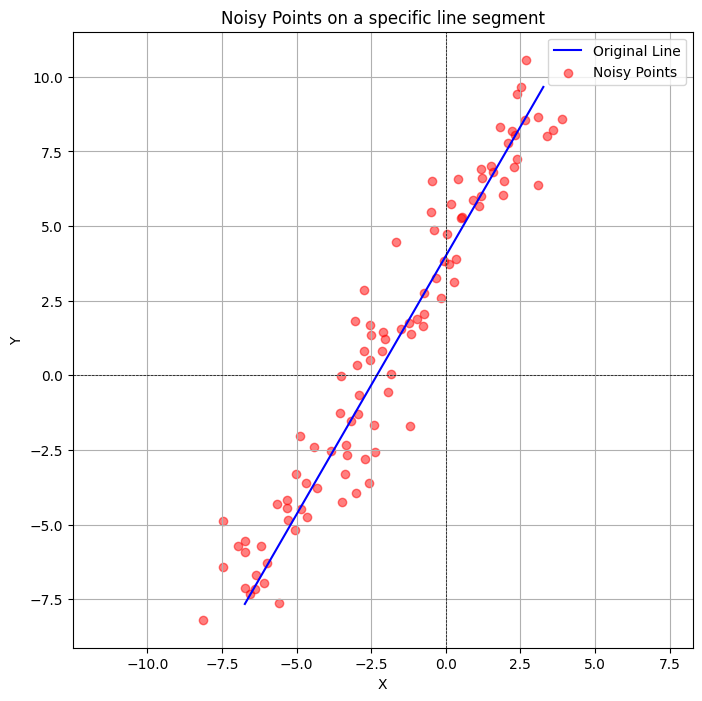

In [246]:
def add_noise(x, y, mean=0, std=0.5):
    noi_x = np.random.normal(mean, std, x.shape)
    noi_y = np.random.normal(mean, std, y.shape)
    return x + noi_x, y + noi_y

a = 60 #
d = 2  # Distance from origin
x_s, y_s = gen_line_pts(np.deg2rad(a), d)      # generating specific line points
x_n, y_n = add_noise(x_s, y_s, 0, 0.7)         # adding noise

# Ploting the noisy points
plt.figure(figsize=(8, 8))
plt.plot(x_s, y_s, 'b-', label='Original Line')
plt.scatter(x_n, y_n, color='red', alpha=0.5, label='Noisy Points')
plt.title('Noisy Points on a specific line segment')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.axis('equal')
plt.show()

#Part 3 - estimate the parameters of the original line and compute the error compared to known parameters


In [247]:
from scipy import stats
# Performing linear regression on noisy data
s, i, r_val, p_val, std_err = stats.linregress(x_n, y_n)   # here s is slope and i is intercept

# Calculating estimated angle and distance
est_ang_rad = np.arctan(s)
est_dist = i / np.sin(est_ang_rad)
est_ang_deg = np.rad2deg(est_ang_rad)

# Calculating the error
ang_err = abs(a - est_ang_deg)           # a is original angle which we picked which is 45
dist_err = abs(d - est_dist)

# Printing the results
print(f"Original Angle = {a} degrees")
print(f"Estimated Angle = {est_ang_deg:.2f} degrees")
print(f"Angle Error = {ang_err:.2f} degrees")
print(f"Original Distance = {d}")
print(f"Estimated Distance = {est_dist:.2f}")
print(f"Distance Error = {dist_err:.2f}")


Original Angle = 60 degrees
Estimated Angle = 57.87 degrees
Angle Error = 2.13 degrees
Original Distance = 2
Estimated Distance = 4.68
Distance Error = 2.68


* Angle Error (L1): The absolute difference between the estimated angle and the original angle.
* Distance Error (L1): The absolute difference between the estimated distance and the original distance.

# Part 4: Plot a graph showing the error as a function of noise level

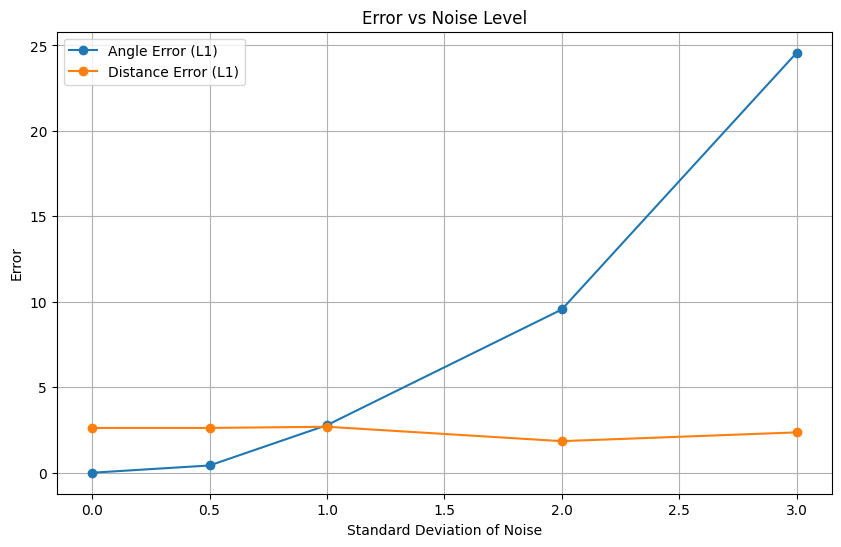

In [248]:
n_lvls = [(0, 0), (0, 0.5), (0, 1), (0, 2), (0, 3)]  #Giving noise levels

ang_errs = []   # Lists to store angle errors
dist_errs = []   # for distance errors

for mean, std in n_lvls:
    x_n, y_n = add_noise(x_s, y_s, mean, std)    #adding noise
    s, i, r_val, p_val, std_err = stats.linregress(x_n, y_n)  #performing linear regression
    est_ang_rad = np.arctan(s)
    est_distance = i / np.sin(est_ang_rad)
    est_ang_deg = np.rad2deg(est_ang_rad)
    ang_err = abs(a - est_ang_deg)
    dist_err = abs(d - est_distance)
    ang_errs.append(ang_err)
    dist_errs.append(dist_err)


# Graph Plotting
std_devs = [std for _, std in n_lvls]

plt.figure(figsize=(10, 6))
plt.plot(std_devs, ang_errs, label='Angle Error (L1)', marker='o')
plt.plot(std_devs, dist_errs, label='Distance Error (L1)', marker='o')
plt.xlabel('Standard Deviation of Noise')
plt.ylabel('Error')
plt.title('Error vs Noise Level')
plt.grid(True)
plt.legend()
plt.show()

# Part 5: Introduce a percentage of outlier and Reestimate the Line parameters

***Reestimated Parameters***: 

Outlier Percentage: 11%
Estimated Angle: 35.87 degrees
Estimated Distance: 4.13
Angle Error: 35.33 degrees
Distance Error: 2.13

Outlier Percentage: 12%
Estimated Angle: 31.13 degrees
Estimated Distance: 5.03
Angle Error: 30.70 degrees
Distance Error: 3.03

Outlier Percentage: 13%
Estimated Angle: 28.56 degrees
Estimated Distance: 4.19
Angle Error: 28.15 degrees
Distance Error: 2.19

Outlier Percentage: 14%
Estimated Angle: 27.29 degrees
Estimated Distance: 4.11
Angle Error: 26.86 degrees
Distance Error: 2.11

Outlier Percentage: 15%
Estimated Angle: 29.57 degrees
Estimated Distance: 5.26
Angle Error: 29.14 degrees
Distance Error: 3.26



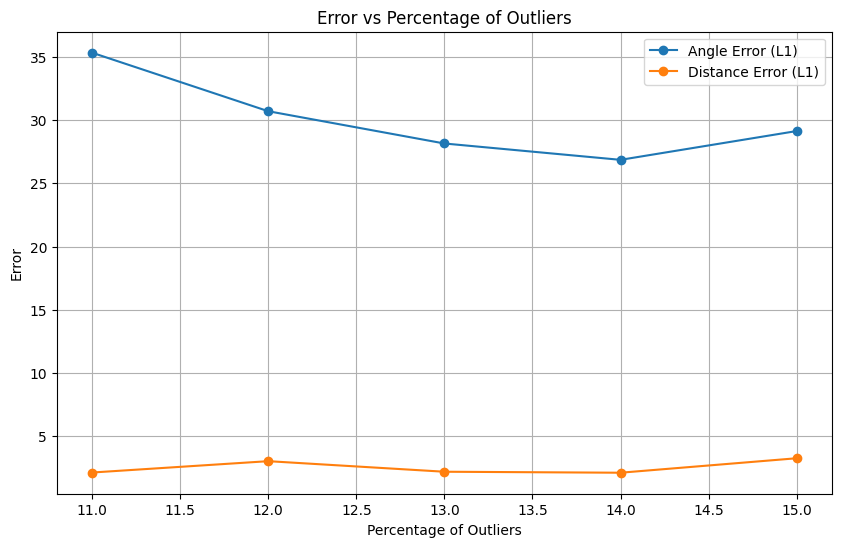

In [249]:
#funtion returning x and y outliers
def add_outliers(x, y, p):
    n_out = int(len(x) * p / 100)
    i = np.random.choice(len(x), n_out, replace=False)
    x_out = x.copy()
    y_out = y.copy()
    x_out[i] += np.random.uniform(-10, 10, n_out)
    y_out[i] += np.random.uniform(-10, 10, n_out)
    return x_out, y_out

out_percent =  [11,12,13,14,15]  #outlier percentages

a_errors = []    # List to angle errors
d_errors = []  # list to distance errors
estimated_params = []

for i in out_percent:
    x_out, y_out = add_outliers(x_n, y_n, i)
    s, i, a, b, c = stats.linregress(x_out, y_out)
    est_ang_rad = np.arctan(s)
    est_dist = i / np.sin(est_ang_rad)
    est_ang_deg = np.rad2deg(est_ang_rad)
    a_error = abs(a - est_ang_deg)
    d_error = abs(d - est_dist)
    a_errors.append(a_error)
    d_errors.append(d_error)
    estimated_params.append((est_ang_deg, est_dist))


# Printing Results
print("***Reestimated Parameters***: \n")
for i, pct in enumerate(out_percent):
    est_ang_deg, est_dist = estimated_params[i]
    print(f"Outlier Percentage: {pct}%")
    print(f"Estimated Angle: {est_ang_deg:.2f} degrees")
    print(f"Estimated Distance: {est_dist:.2f}")
    print(f"Angle Error: {a_errors[i]:.2f} degrees")
    print(f"Distance Error: {d_errors[i]:.2f}\n")

# Plotting Graph
plt.figure(figsize=(10, 6))
plt.plot(out_percent, a_errors, label='Angle Error (L1)', marker='o')
plt.plot(out_percent, d_errors, label='Distance Error (L1)', marker='o')
plt.xlabel('Percentage of Outliers')
plt.ylabel('Error')
plt.title('Error vs Percentage of Outliers')
plt.grid(True)
plt.legend()
plt.show()


# Part 6: Cv2. fitLine function for robust line estimation, utilizing the CV_DIST_HUBER distance.

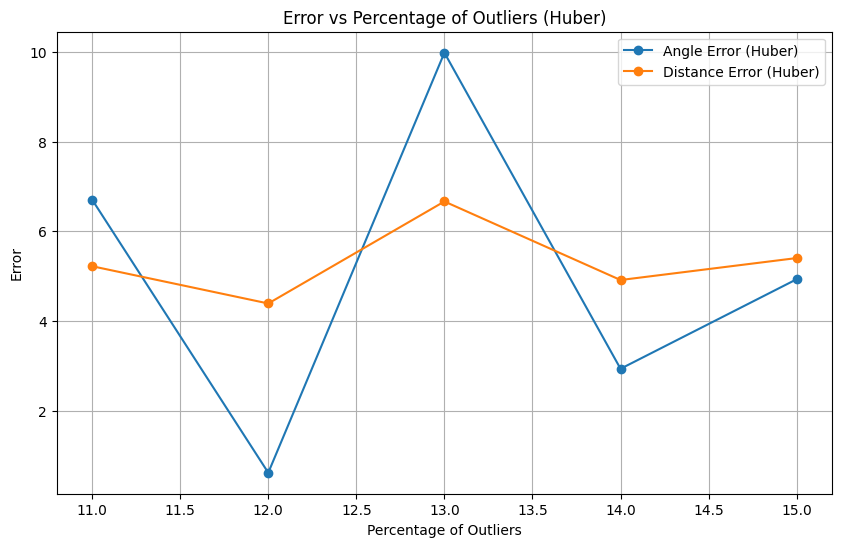

In [250]:
def robust_est(x, y):
    pt = np.column_stack((x, y)).astype(np.float32)
    [vx, vy, x0, y0] = cv2.fitLine(pt, cv2.DIST_HUBER, 0, 0.01, 0.01)
    s = vy / vx        #slope
    i = y0 - s * x0    #intercept
    a = np.arctan(s)   #angle
    d = i / np.sin(a)  #distance
    return a, d


# Adding Gaussian noise
x_n, y_n= add_noise(x_n, y_n, mean=0, std=1)
out_prcent = [11, 12, 13, 14, 15]   #outlier percentages

ang_err_huber = []   #list to store angle error using huber
dist_err_huber = []  #list to store distance error using huber


for i in out_prcent:
    x_out, y_out = add_outliers(x_n, y_n, i)
    est_ang_rad_huber, est_dist_huber = robust_est(x_out, y_out)  #Performing Robust estimation
    est_ang_deg_huber = np.rad2deg(est_ang_rad_huber)
    ang_err = abs(60 - est_ang_deg_huber)  # Calculating angle error
    dist_err = abs(2 - est_dist_huber)  # Calculating distance error
    ang_err_huber.append(ang_err)
    dist_err_huber.append(dist_err)


# Graph Plotting
plt.figure(figsize=(10, 6))
plt.plot(out_prcent, ang_err_huber, label='Angle Error (Huber)', marker='o')
plt.plot(out_prcent, dist_err_huber, label='Distance Error (Huber)', marker='o')
plt.xlabel('Percentage of Outliers')
plt.ylabel('Error')
plt.title('Error vs Percentage of Outliers (Huber)')
plt.grid(True)
plt.legend()
plt.show()


#Part 7: Analysis and report

***Findings***

* **The Effect of Noise**


Part 3 shows clearlyvhow increased noise levels directly correlate with higher errors in line parameter estimation. This shows the critical need for noise reduction techniques in computer vision, given that real-world images often contain noise.

* **Outliers and Linear Regression**

This part illustrates the sensitivity of linear regression to outliers, showing that even a small percentage can drastically skew estimated line parameters. This sensitivity emphasizes the necessity for robust estimation techniques that are less affected by outliers.

* **Robustness of the Huber Distance**

The analysis reveals that the Huber distance method offers superior robustness compared to standard linear regression. It effectively handles outliers, resulting in more stable parameter estimation. This robustness makes the Huber distance method a preferred choice for line estimation tasks in real-world scenarios where outliers are likely present.

***Conclusion***

*  Increasing noise levels lead to higher errors in line parameter estimation.

*  Outliers significantly impact the accuracy of linear regression, causing larger errors.

* The Huber distance method offers better resistance to outliers, resulting in more stable parameter estimation compared to standard linear regression.